In [107]:
import pandas as pd
import numpy as np
from surprise import Reader
from surprise import accuracy
from sklearn.decomposition import NMF
from surprise.prediction_algorithms.random_pred import NormalPredictor
import seaborn as sns
from surprise.model_selection.split import train_test_split
from surprise import SVD
from surprise import KNNBasic
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt

In [108]:
df = pd.read_csv("user_movies.csv",index_col=0)
# Reset the index to move movieId to a regular column
df = df.reset_index()

# Print the first 10 rows of the DataFrame to check the result
df.head(10)

,userId,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
#extract items
movies = df.columns.to_list()
movies

['userId',
 "'71 (2014)",
 "'Hellboy': The Seeds of Creation (2004)",
 "'Round Midnight (1986)",
 "'Salem's Lot (2004)",
 "'Til There Was You (1997)",
 "'Tis the Season for Love (2015)",
 "'burbs, The (1989)",
 "'night Mother (1986)",
 '(500) Days of Summer (2009)',
 '*batteries not included (1987)',
 '...All the Marbles (1981)',
 '...And Justice for All (1979)',
 '00 Schneider - Jagd auf Nihil Baxter (1994)',
 '1-900 (06) (1994)',
 '10 (1979)',
 '10 Cent Pistol (2015)',
 '10 Cloverfield Lane (2016)',
 '10 Items or Less (2006)',
 '10 Things I Hate About You (1999)',
 '10 Years (2011)',
 '10,000 BC (2008)',
 '100 Girls (2000)',
 '100 Streets (2016)',
 '101 Dalmatians (1996)',
 '101 Dalmatians (One Hundred and One Dalmatians) (1961)',
 "101 Dalmatians II: Patch's London Adventure (2003)",
 '101 Reykjavik (101 Reykjavík) (2000)',
 '102 Dalmatians (2000)',
 '10th & Wolf (2006)',
 '10th Kingdom, The (2000)',
 '10th Victim, The (La decima vittima) (1965)',
 '11\'09"01 - September 11 (2002)',

In [110]:
# extract_users
users = df.index.to_list()
users

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [111]:
# imputing with the movie average rating

df = df.fillna(df.mean())
df


,userId,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,1,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,4.000000,1.0
1,2,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
2,3,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
3,4,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
4,5,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,606,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
606,607,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
607,608,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,...,1.5,4.0625,3.666667,3.0,3.0,4.500000,3.500000,2.0,3.134615,1.0
608,609,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0


## Surprise — Model Selection

In [153]:
ratings_dict = {'userID': [9, 32, 2, 45, 1],
                'movieID': [1, 1, 1, 2, 2],
                'rating': [3, 2, 4, 3, 1]}
df = pd.DataFrame.from_dict(ratings_dict)
df

,userID,movieID,rating
0,9,1,3
1,32,1,2
2,2,1,4
3,45,2,3
4,1,2,1


In [154]:
# You'll need to create a dummy reader
#reader = Reader(line_format='user item rating', rating_scale=(1, 5))
reader

In [155]:
from surprise import Dataset
reader = Reader()

# Loading local dataset
data = Dataset.load_from_df(df, reader)

# Use SVD algorithm or other models
model = SVD()

# cross-validation with no. of kfold=5 (can be changed per your need)
cross_validate(model, data, measures=['rmse', 'mae'], cv=5,)


{'test_rmse': array([0.42089159, 0.62555669, 0.87658449, 1.69326765, 1.99807188]),
 'test_mae': array([0.42089159, 0.62555669, 0.87658449, 1.69326765, 1.99807188]),
 'fit_time': (0.0005691051483154297,
  0.0006747245788574219,
  0.0005030632019042969,
  0.00013184547424316406,
  0.0001010894775390625),
 'test_time': (2.3126602172851562e-05,
  2.8371810913085938e-05,
  2.5272369384765625e-05,
  1.621246337890625e-05,
  1.3828277587890625e-05)}

In [156]:
#!pip install scikit-surprise

### Train on a whole trainset and the predict() method

In [157]:
from surprise.model_selection import KFold
# Retrieve the trainset.
trainset = data.build_full_trainset()

# Build an algorithm, and train it.
algo = KNNBasic()

kf = KFold(n_splits=5)

for trainset, testset in kf.split(data):

    # train and test algorithm.
    algo.fit(trainset)
    predictions = algo.test(testset)

    # Compute and print Root Mean Squared Error
    accuracy.rmse(predictions, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.7500
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.5000
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.7500
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.5000
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.0000


### Tune algorithm parameters with GridSearchCV

In [158]:
from surprise.model_selection import GridSearchCV

In [159]:
param_grid = {"n_epochs": [5, 10], "lr_all": [0.002, 0.005], "reg_all": [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score["rmse"])

# combination of parameters that gave the best RMSE score
print(gs.best_params["rmse"])
algo = gs.best_estimator["rmse"]
algo.fit(data.build_full_trainset())

1.4315936240150808
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


In [160]:
df

,userID,movieID,rating
0,9,1,3
1,32,1,2
2,2,1,4
3,45,2,3
4,1,2,1


In [164]:
reader = Reader(rating_scale=(0.5, 5)) #line_format by default order of the fields

# Surprise Dataset Load method
data = Dataset.load_from_df(df[["userID","movieID","rating"]], reader=reader)

trainset = data.build_full_trainset()

testset = trainset.build_anti_testset()
trainset

### Surprise Library has a built-in SVD Computation


In [165]:
 ## checking the effect of number of latent factors k on the model's performance.
def rmse_vs_factors(algorithm, data):
    """Returns: rmse_algorithm i.e. a list of mean RMSE of CV = 5 in cross_validate() for each  factor k in range(1, 101, 1) 100 values 
    Arg:  i.) algorithm = Matrix factoization algorithm, e.g SVD/NMF/PMF, ii.)  data = surprise.dataset.DatasetAutoFolds
    """
    rmse_algorithm = []
    
    for k in range(1, 101, 1):
        algo = algorithm(n_factors = k)

        #["test_rmse"] is a numpy array with min accuracy value for each testset
        loss_fce = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)["test_rmse"].mean() 
        rmse_algorithm.append(loss_fce)
  
    return rmse_algorithm


In [167]:
rmse_svd = rmse_vs_factors(SVD,data)
rmse_svd

[1.1275100400224332,
 1.1275617662183142,
 1.1283843495355848,
 1.126019097392702,
 1.1290641047754708,
 1.1274178360337497,
 1.1263857628213625,
 1.1296075438194557,
 1.1289418184896665,
 1.1246611238418573,
 1.1266527555712318,
 1.1253755151213034,
 1.1283554441642978,
 1.127788398754142,
 1.1255361370269523,
 1.1277760466501014,
 1.1270564183619651,
 1.1257565810880916,
 1.1261805245473853,
 1.1252382637250733,
 1.127968128002051,
 1.1297481529579694,
 1.1284125977758586,
 1.1293769417706059,
 1.12730376708132,
 1.1258444292680028,
 1.1226920739474218,
 1.12563651677188,
 1.1258104816891326,
 1.1299034068746052,
 1.1248288577758616,
 1.1266685601706097,
 1.1245067975033145,
 1.1245455070504164,
 1.126997171263421,
 1.132147202412661,
 1.1250833308075436,
 1.1204119262786996,
 1.1246616212726912,
 1.1268807653538202,
 1.131656701109964,
 1.1258866027969683,
 1.1226262867467114,
 1.12441759386496,
 1.1244218380379252,
 1.1305788340301144,
 1.1260376222189834,
 1.1280505432869987,
 1.1

In [168]:
def plot_rmse(rmse, algorithm):
    plt.figure(num=None, figsize=(11, 5), dpi=80, facecolor='w', edgecolor='k')
        
    plt.subplot(2,1,1)
    plt.plot(rmse)
    plt.xlim(0,100)
    plt.title("{0} Performance: RMSE Against Number of Factors".format(algorithm), size = 20 )
    plt.ylabel("Mean RMSE (cv=5)")

    plt.subplot(2,1,2)
    plt.plot(rmse)
    plt.xlim(0,50)
    plt.xticks(np.arange(0, 52, step=2))

    plt.xlabel("{0}(n_factor = k)".format(algorithm))
    plt.ylabel("Mean RMSE (cv=5)")
    plt.axvline(np.argmin(rmse), color = "r")


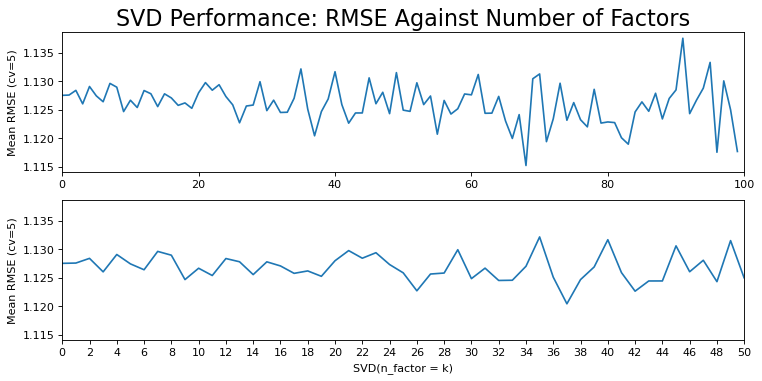

In [169]:
plot_rmse(rmse_svd,"SVD")

### Predictions using function 

In [173]:
def get_top_n(predictions, userId, movies_df, ratings_df, n = 10):
    '''Return the top N (default) movieId for a user,.i.e. userID and history for comparisom
    Args:
    Returns: 
  
    '''
    
    #1. First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_n[uid] = user_ratings[: n ]
    
    
    #3. Tells how many movies the user has already rated
    user_data = ratings_df[ratings_df.userId == (userId)]
    print('User {0} has already rated {1} movies.'.format(userId, user_data.shape[0]))

    
    #4. Data Frame with predictions. 
    preds_df = pd.DataFrame([(id, pair[0],pair[1]) for id, row in top_n.items() for pair in row],
                        columns=["userId" ,"movieId","rat_pred"])
    
    
    #5. Return pred_usr, i.e. top N recommended movies with (merged) titles and genres. 
    pred_usr = preds_df[preds_df["userId"] == (userId)].merge(movies_df, how = 'left', left_on = 'movieId', right_on = 'movieId')
            
    #6. Return hist_usr, i.e. top N historically rated movies with (merged) titles and genres for holistic evaluation
    hist_usr = df[df.userId == (userId) ].sort_values("rating", ascending = False).merge\
    (df, how = 'left', left_on = 'movieId', right_on = 'movieId')
    
    
    return hist_usr, pred_usr

In [178]:
hist_SVD_124, pred_SVD_124 = get_top_n(1233746670783726, df, userId =124, 4)

SyntaxError: positional argument follows keyword argument (3984896032.py, line 1)

In [179]:
hist_SVD_124.head(15)

NameError: name 'hist_SVD_124' is not defined